# CS109B - Project - Milestone 1

### Sathish Angappan, Hannah Bend, Yohann Smadja


This notebook uses three APIs, tmdbsimple, IMDbPY and wikipedia, to download information, posters and plots of our favorite movies. We start with one of the best movies of all time, Lost In Translation from Sofia Coppola staring the hillarious Bill Murray and Scarlett Johansson. For this movie, we downloaded basis information, the best rated poster and the plot from wikipedia. For this movie, TMDB and IMDB have the same genre classification, "Drama", but we know, it is not always the case.

We downloaded information on the 10 most popular movies of 2016 and the top 100 of the past 60 years to have a look at genre distribution. 


## 0. Setting up the environment

Please install the libraries below if it is not already done and upload all the packages we will need for this notebook.

In [22]:
# Install the packages tmdbsimple, wikipedia and IMDbPY
#!pip install tmdbsimple
#!pip install wikipedia
#!pip install IMDbPY #(You might need to update the Microsoft Visual C++ Compiler for Python 2.7... follow the link provided in the error message if any)

In [1]:
# Load useful libraries
import tmdbsimple as tmdb  # https://github.com/celiao/tmdbsimple/blob/master/tmdbsimple
import imdb as imdb
import wikipedia
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time

# tmdb's key
#tmdb.API_KEY = '594267d26bf6b98fd83b7bfd1729b426'  # Sathish's key
tmdb.API_KEY = '3a2bb32bfd2ff33e8a6feed3eb9145cf' #wife key

## 1. Search for the movie "Lost in Translation"

### 1.1. TMDB search

In [12]:
search = tmdb.Search()
response = search.movie(query='Lost in translation')
for s in search.results:
    print s
    print(s['title'], s['id'], s['release_date'], s['popularity'])

{u'poster_path': u'/5T8VvuFTdaawKLJk34i69Utaw7o.jpg', u'title': u'Lost in Translation', u'overview': u"Two lost souls visiting Tokyo -- the young, neglected wife of a photographer and a washed-up movie star shooting a TV commercial -- find an odd solace and pensive freedom to be real in each other's company, away from their lives in America.", u'release_date': u'2003-08-31', u'popularity': 4.844359, u'original_title': u'Lost in Translation', u'backdrop_path': u'/gkbtPw5gyp8exaKw4zXEyH33J1m.jpg', u'vote_count': 1525, u'video': False, u'adult': False, u'vote_average': 7.3, u'original_language': u'en', u'id': 153, u'genre_ids': [18]}
(u'Lost in Translation', 153, u'2003-08-31', 4.844359)
{u'poster_path': u'/wEfh51lkfCVOY7hhQ3kEFIb1oUZ.jpg', u'title': u'Trevor Noah: Lost In Translation', u'overview': u'Filmed at The Lincoln Theatre in Washington, D.C., "Trevor Noah: Lost in Translation" brings Noah\'s unique world-view and global analysis of American culture to the forefront. In the specia

### 1.2. TMDB basic information

In [13]:
lostintranslation = tmdb.Movies(153)
lostintranslation.info()

{u'adult': False,
 u'backdrop_path': u'/gkbtPw5gyp8exaKw4zXEyH33J1m.jpg',
 u'belongs_to_collection': None,
 u'budget': 4000000,
 u'genres': [{u'id': 18, u'name': u'Drama'}],
 u'homepage': u'',
 u'id': 153,
 u'imdb_id': u'tt0335266',
 u'original_language': u'en',
 u'original_title': u'Lost in Translation',
 u'overview': u"Two lost souls visiting Tokyo -- the young, neglected wife of a photographer and a washed-up movie star shooting a TV commercial -- find an odd solace and pensive freedom to be real in each other's company, away from their lives in America.",
 u'popularity': 3.844359,
 u'poster_path': u'/5T8VvuFTdaawKLJk34i69Utaw7o.jpg',
 u'production_companies': [{u'id': 70, u'name': u'American Zoetrope'}],
 u'production_countries': [{u'iso_3166_1': u'JP', u'name': u'Japan'},
  {u'iso_3166_1': u'US', u'name': u'United States of America'}],
 u'release_date': u'2003-08-31',
 u'revenue': 119723856,
 u'runtime': 102,
 u'spoken_languages': [{u'iso_639_1': u'ja', u'name': u'\u65e5\u672c\u8a

### 1.3. IMDB search

In [14]:
ia = imdb.IMDb() 
response_imdb = ia.search_movie('Lost in translation')
response_imdb[0]
for s in response_imdb:
    print (s['title'], s.movieID)

(u'Lost in Translation', '0335266')
(u'Lost in Translation', '1660392')
(u'Lost in Translation', '4531002')
(u'Lost in Translation', '3131256')
(u'Lost in Translation (2012) (TV Episode)  - Season 1 | Episode 7  - The Exes', '2148549')
(u"Lost in Translation (2010) (TV Episode)  - Season 6 | Episode 9  - Australia's Next Top Model", '1803820')
(u'Lost in Translation (2016) (TV Episode)  - Season 3 | Episode 8  - Match Not Found', '6366034')
(u'Lost in Translation (2009) (TV Episode)  - Season 3 | Episode 3  - Robin Hood', '1278944')
(u'Lost in Translation (2011) (TV Episode)  - Season 1 | Episode 8  - Troopers', '1967401')
(u'Lost in Translation (2015) (TV Episode)  - Season 1 | Episode 3  - Bangkok Airport', '4603388')
(u'Lost in Translation (2011) (TV Episode)  - Season 1 | Episode 11  - The Whole Truth', '1770474')
(u'Lost in Translation (2013) (TV Episode)  - Season 1 | Episode 1  - Bible Secrets Revealed', '3343578')
(u"Lost in Translation (2018) (TV Episode)  - Season 2 | Episode

### 1.4. IMDB basic information

In [15]:
lostintranslation_imdb = response_imdb[0]
ia.update(lostintranslation_imdb)

print "Title:", lostintranslation_imdb["title"]
print "Director:", lostintranslation_imdb["director"][0]
print "Genre:", lostintranslation_imdb["genre"][0]

Title: Lost in Translation
Director: Sofia Coppola
Genre: Drama


Both TMDB and IMDB have the same genre classification, "Drama". 

## 2. Path to the movie poster

Using the TMDB API we download the best rated poster of "Lost in Translation".

In [16]:
CONFIG_PATTERN = 'https://api.themoviedb.org/3/movie/550?api_key={key}'
url = CONFIG_PATTERN.format(key=tmdb.API_KEY)
r = requests.get(url)
config = r.json()

In [17]:
CONFIG_PATTERN = 'http://api.themoviedb.org/3/configuration?api_key={key}'
url = CONFIG_PATTERN.format(key=tmdb.API_KEY)
r = requests.get(url)
config = r.json()

# Function to return always the biggest (highest definition) image
base_url = config['images']['base_url']
sizes = config['images']['poster_sizes']
"""
    'sizes' should be sorted in ascending order, so max_size = sizes[-1] should get the largest size as well.        
"""
def size_str_to_int(x):
    return float("inf") if x == 'original' else int(x[1:])
max_size = max(sizes, key=size_str_to_int)

In [18]:
print sizes
print max_size

[u'w92', u'w154', u'w185', u'w342', u'w500', u'w780', u'original']
original


In [19]:
# Download the the best rated poster of "Lost in Translation"
IMDBID = lostintranslation.imdb_id

IMG_PATTERN = 'http://api.themoviedb.org/3/movie/{imdbid}/images?api_key={key}' 
r = requests.get(IMG_PATTERN.format(key=tmdb.API_KEY,imdbid=IMDBID))
api_response = r.json()
path = api_response['posters'][0]['file_path']
url_poster = "{0}{1}{2}".format(base_url, max_size, path)

print url_poster

http://image.tmdb.org/t/p/original/5T8VvuFTdaawKLJk34i69Utaw7o.jpg


In [20]:
from IPython.display import Image
Image(url= url_poster)

The facial expression of Bill Murray translate perfectly the mood of his character, Bob Harris, an aging movie star in the middle of his midlife crisis. The colors of his hotel room were also selected attentively. 

It was noted by a critic that the light contrasts supported the story as light tones were a symbole of romance and dark tones symbolized despondency. 

Is deep learning able to learn those features to classify movies by genre?

## 3. Cast and Crew

TMDB allows us to download the list of actors and other people who worked on the movie. 

In [21]:
pd.DataFrame(lostintranslation.credits()['cast'])[["character","name", "id"]].head()

,character,name,id
0,Bob Harris,Bill Murray,1532
1,Charlotte,Scarlett Johansson,1245
2,Kelly,Anna Faris,1772
3,John,Giovanni Ribisi,1771
4,Ms. Kawasaki,Akiko Takeshita,1770


In [22]:
pd.DataFrame(lostintranslation.credits()['crew'])[["job", "name", "id"]].head()

,job,name,id
0,Director,Sofia Coppola,1769
1,Producer,Francis Ford Coppola,1776
2,Set Decoration,Tomomi Nishio,1676654
3,Producer,Sofia Coppola,1769
4,Producer,Ross Katz,1777


Scarlett Johansson have played in Action movies recently but director Sofia Coppola has been mostly working on dramas. 

Can we use the list of cast and crew to classify movies by genre? 


## 4. Genre of the movie

In [23]:
print "TMDB's genre id:" , lostintranslation.info()['genres'][0]["id"]
print "TMDB's genre name:" , lostintranslation.info()['genres'][0]["name"]

TMDB's genre id: 18
TMDB's genre name: Drama


In [24]:
print "IMDB's genre:", lostintranslation_imdb["genre"][0]

IMDB's genre: Drama


For this movie, the TMDB genre matches the one from IMDB.

## 5. 10 most popular movies of 2016 from TMDb

Here is the code to download from TMDB the 10 most popular movies from 2016. Pairing a movie with it's genre is quite easy.

In [26]:
# Indicate the number of pages (20 results per page)
discover = tmdb.Discover()
response = discover.movie(primary_release_year=2016, sort_by='popularity.desc')
df_2016 = pd.DataFrame(index = range(10), columns = [["title", "id", "release_date", "popularity", "genre_ids"]])
for k, s in zip(range(5), discover.results[:5]):
    print s
    df_2016.iloc[k] = dict(title = s['title'], id = s['id'], release_date = s['release_date'], popularity = s['popularity'], genre_ids = s["genre_ids"])
df_2016

{u'poster_path': u'/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg', u'title': u'Sing', u'overview': u'A koala named Buster recruits his best friend to help him drum up business for his theater by hosting a singing competition.', u'release_date': u'2016-11-23', u'popularity': 66.294696, u'original_title': u'Sing', u'backdrop_path': u'/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg', u'vote_count': 1192, u'video': False, u'adult': False, u'vote_average': 6.7, u'original_language': u'en', u'id': 335797, u'genre_ids': [16, 35, 18, 10751, 10402]}
{u'poster_path': u'/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg', u'title': u'Fantastic Beasts and Where to Find Them', u'overview': u'In 1926, Newt Scamander arrives at the Magical Congress of the United States of America with a magically expanded briefcase, which houses a number of dangerous creatures and their habitats. When the creatures escape from the briefcase, it sends the American wizarding authorities after Newt, and threatens to strain even further the state of magical and non-m

,title,id,release_date,popularity,genre_ids
0,Sing,335797,2016-11-23,66.2947,"[16, 35, 18, 10751, 10402]"
1,Fantastic Beasts and Where to Find Them,259316,2016-11-16,38.7177,"[12, 28, 14]"
2,Rogue One: A Star Wars Story,330459,2016-12-14,34.2469,"[28, 18, 878, 10752]"
3,Finding Dory,127380,2016-06-16,31.2226,"[12, 16, 35, 10751]"
4,Boyka: Undisputed IV,348893,2016-09-22,27.1542,[28]
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


## 6. 60 years of top 100

We wanted to go a bit further and downloaded the 100 most popular movies of each year for the last 60 years.

### 6.1 Download data from TMDB

In [2]:
# Dowload the 100 most popular movie of the pas 60 years

# DO NOT RE RUN THE CODE. CSV FILE CREATED IN NEXT CELL AND UPLOADED TO GIT
df = pd.DataFrame(index = range(200), columns = [["title", "id", "release_date", "popularity", "poster_path", "genre_ids"]])

i=0
for y in range(2):
    for p in range(5):
        discover = tmdb.Discover()
        response = discover.movie(page = (p+1), primary_release_year=(2016-y), sort_by='popularity.desc')
        time.sleep(1) 
        for k, s in zip(range(20*i,20*(i+1)), discover.results):
            df.iloc[k] = dict(title = s['title'], id = s['id'], release_date = s['release_date'], popularity = s['popularity'], 
                              poster_path = s["poster_path"], genre_ids = s["genre_ids"])
        i+=1
df.to_csv('tmdb2years.csv', encoding='utf-8')  
df.tail()

,title,id,release_date,popularity,poster_path,genre_ids
195,Solace,339527,2015-09-03,2.66507,/4MkNIKVZxYkga4208RXdRZ76zjf.jpg,"[80, 18, 9648]"
196,Project Almanac,227719,2015-01-30,2.63694,/g3Krq7P7pkgjWpzUDA6lrniiSJ7.jpg,"[878, 53]"
197,Entourage,188222,2015-06-03,2.59071,/lR4dwcfgCBMklKjiQXuFzRM3gfl.jpg,[35]
198,Maggie,287424,2015-05-08,2.58368,/mFt7Oo3pf8f1BZAdWLyUpYM63aT.jpg,[27]
199,Concussion,321741,2015-11-12,2.54387,/vdK1f9kpY5QEwrAiXs9R7PlerNC.jpg,[18]


In [4]:
base_url = 'http://image.tmdb.org/t/p/original/'
import urllib
def url2poster(movie):
    url = base_url+movie['poster_path']
    urllib.urlretrieve(url, './movie_posters1/'+str(movie['id'])+".jpg")
    time.sleep(0.05)
    
df[pd.notnull(df['poster_path'])].apply(url2poster, axis = 1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
170    None
171    None
172    None
173    None
174    None
175    None
176    None
177    None
178    None
179    None
180    None
181    None
182    None
183    None
184    None
185    None
186    None
187    None
188    None
189    None
190    None
191    None
192    None
193    None
194    None
195    None
196    None
197    None
198    None
199    None
dtype: object

In [8]:
import os
import PIL
from PIL import Image
images = os.listdir("./movie_posters1")
basewidth = 300
for img_jpg in images:
    img = Image.open('./movie_posters1/' + str(img_jpg))
    #img = Image.open(base_url+'5vHssUeVe25bMrof1HyaPyWgaP.jpg')
    #wpercent = (basewidth/float(img.size[0]))
    #hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((350,500), PIL.Image.ANTIALIAS)
    img.save('./resized/'+str(img_jpg))

In [10]:
df = pd.read_csv("tmdb2years.csv")
df.head()

,Unnamed: 0,title,id,release_date,popularity,poster_path,genre1,genre2,genre3,genre4,genre5,Unnamed: 11
0,0,Sing,335797,11/23/2016,52.849585,/eSVtBB2PVFbQiFWC7CQi3EjIZnn.jpg,16,35.0,18.0,10751.0,10402.0,NaN
1,1,Split,381288,11/15/2016,31.706741,/rXMWOZiCt6eMX22jWuTOSdQ98bY.jpg,27,53.0,NaN,NaN,NaN,NaN
2,2,Fantastic Beasts and Where to Find Them,259316,11/16/2016,29.288592,/dXwbjYyZH1Se0IS3oVcPdvueLKd.jpg,28,12.0,14.0,NaN,NaN,NaN
3,3,Rogue One: A Star Wars Story,330459,12/14/2016,27.319649,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,28,18.0,878.0,10752.0,NaN,NaN
4,4,Deadpool,293660,2/9/2016,26.911966,/inVq3FRqcYIRl2la8iZikYYxFNR.jpg,28,12.0,35.0,10749.0,NaN,NaN


In [17]:
from ast import literal_eval

# Do not re-run the code.... just use the uploaded csv file
#df = pd.read_csv(r'tmdb60years.csv')
df = pd.read_csv('https://raw.githubusercontent.com/satkuma/cs109B_public/master/tmdb60years.csv')
df = df.drop('Unnamed: 0', 1)
df['genre_ids'] = df['genre_ids'].apply(literal_eval)
df.tail()

,title,id,release_date,popularity,genre_ids
5995,Johnny Tremain,43229,1957-06-15,1.092711,"[18, 10751]"
5996,The Big Caper,83578,1957-03-28,1.090697,"[18, 53, 80]"
5997,Kiss Them for Me,52367,1957-12-10,1.090529,"[35, 10749, 10752]"
5998,Timid Tabby,92297,1957-04-19,1.089144,"[35, 16, 10751]"
5999,The Helen Morgan Story,111477,1957-10-05,1.088793,"[18, 10402, 10749]"


You can find below the table that link genres' id and their name.

### 6.2 List of genres

In [5]:
url_genre = 'https://api.themoviedb.org/3/genre/movie/list?api_key={key}&language=en-US'.format(key=tmdb.API_KEY)
r = requests.get(url_genre)
list_genre = r.json()
df_list_genres = pd.DataFrame(list_genre["genres"])
df_list_genres.columns = ["main genre" , "main genre name"]
df_list_genres

,main genre,main genre name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [18]:
def main_genre(x):
    if (len(x)<>0):
        return x[0]

def year(x):
    return x.year

def decade(x):
    return (x// 10) * 10

df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].apply(year,1) 
df['release_decade'] = df['release_year'].apply(decade,1)
df["main genre"] = df["genre_ids"].apply(main_genre,1)
df = df.merge(df_list_genres, on='main genre')
df = df.sort_values("release_date")
df.head()

,title,id,release_date,popularity,genre_ids,release_year,release_decade,main genre,main genre name
1660,Night Passage,25381,1957-01-01,1.370028,"[28, 18, 53, 37]",1957,1950,28.0,Action
3043,Witness for the Prosecution,37257,1957-01-01,2.056526,"[18, 9648, 80]",1957,1950,18.0,Drama
4533,Crime of Passion,1920,1957-01-09,1.156651,"[80, 18, 53]",1957,1950,80.0,Crime
3052,Throne of Blood,3777,1957-01-15,1.284247,"[18, 36]",1957,1950,18.0,Drama
4853,20 Million Miles to Earth,15096,1957-02-08,1.267064,[878],1957,1950,878.0,Science Fiction


### 6.3 Distribution of Genres over 60 years

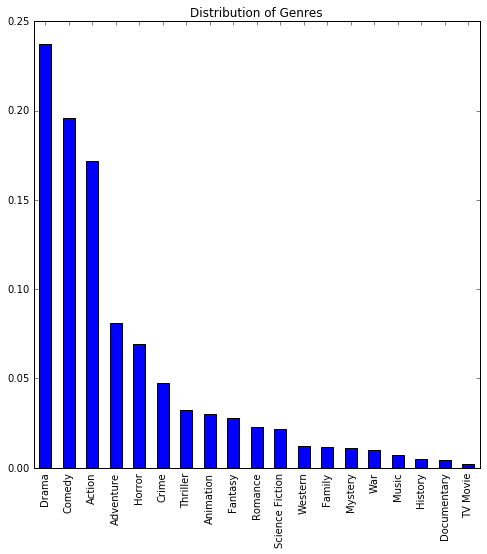

In [12]:
df["main genre name"].value_counts(normalize=True).plot(kind='bar', figsize =(8,8))
plt.title("Distribution of Genres")
plt.show()

### 6.4 Evolution of the distribution of Genres

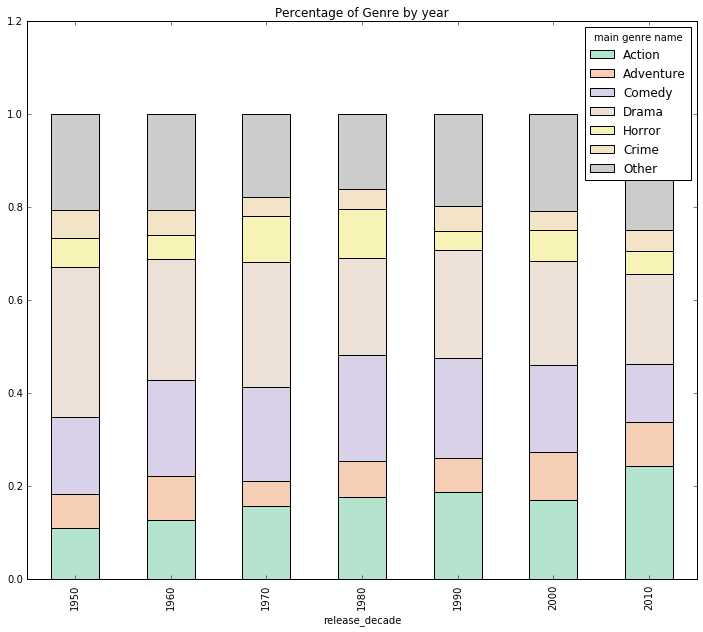

In [49]:
# Frequency of Genre by year
df['1']=1
df_pivot = df.pivot_table(index=['release_decade'], values='1', columns =['main genre name'], aggfunc=sum, fill_value=0)
df = df.drop('1',1)

df2 = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df2["Other"] = df2[["Thriller", "Animation", "Fantasy", "Romance", "Science Fiction", "Western", "Family", "Mystery", "War", "Music", "History", "Documentary", "TV Movie"]].sum(1)

df2[["Action", "Adventure", "Comedy", "Drama", "Horror", "Crime", "Other"]].plot.bar(stacked=True, colormap='Pastel2', figsize=(12,10), title="Percentage of Genre by year")
plt.show()


Looking at the top movies of the last 7 decades by genre, we see that Action movies have been gaining popularity over time (likely aided by exponential improvements in visual effects) while Dramas appear to decrease decade over decade.  Horror movies had a moment in the 70s and 80s, likely due to the success of series like Jaws and Texas Chainsaw Massacre.  Most other top-line genres remained fairly consistent over time, but another interesting thing to note is the increase in the Other category, which is essentially a catch-all for types like Film Noir and Indie. As festivals like the Sundance Film Festival continue to gain notoriety, there has likely been more funding for these niche genres.

## 7. Budget vs Revenue

Could two quantitative variables like budget and revenue can help us classifying movies?

In [110]:
def genre(x):
    m = tmdb.Movies(x)
    time.sleep(1)      ## slow down by 1sec the code to give time to the API to answer
    g_id = m.info()['genres'][0]["id"]
    g_name = m.info()['genres'][0]["name"]
    budget = m.info()["budget"]
    revenue = m.info()["revenue"]
    return g_id, g_name, budget, revenue

df["main genre"], df["main genre name"], df["budget"], df["revenue"] = zip(*df["id"].apply(genre,1))

df[["title", "genre_ids", "main genre", "main genre name", "budget", "revenue"]].head()

,title,genre_ids,main genre,main genre name,budget,revenue
0,Sing,"[16, 35, 18, 10751, 10402]",16,Animation,75000000,601303829
1,Fantastic Beasts and Where to Find Them,"[12, 28, 14]",12,Adventure,180000000,809342332
2,Finding Dory,"[12, 16, 35, 10751]",12,Adventure,200000000,1028131226
3,Deadpool,"[28, 12, 35, 10749]",28,Action,58000000,783112979
4,Rogue One: A Star Wars Story,"[28, 18, 878, 10752]",28,Action,200000000,1053929274


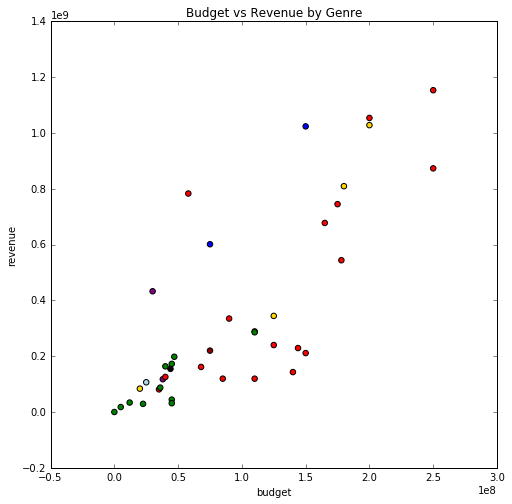

In [122]:
fig, ax = plt.subplots(figsize=(8,8))
colors = {'Animation':'blue', 'Drama':'green', 'Action':'red', 'Adventure':'gold', 'Comedy':'purple', 'Crime':'black', 'Thriller':'darkred', 'History':'lightblue'}
ax.scatter(df_2016_all['budget'], df_2016_all['revenue'], s = 30, c = df_2016_all['main genre name'].apply(lambda x: colors[x]))
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Budget vs Revenue by Genre")
plt.show()

## 8. Genres vs Rating

We looked below at the distribution of ratings by genre.

In [19]:
discover = tmdb.Discover()
response = discover.movie(page = 1, primary_release_year=2016, certification_country='US', 
                          sort_by='vote_average.desc')

In [2]:
import datetime
year = datetime.date.today().year
print year
print datetime.date.today()

2017
2017-04-10


In [21]:
#MILESTONE 2. Download all movies of Genre = "Drama" for Milestone 2. 
#Yohann / Hannah: Please change the genre and run the script.
title = []
ids = []
release_date = []
popularity = []
genre_ids = []
vote_average = []
release_year = []

#Genre ID: 
drama = 18
for y in range(60):
    response = discover.movie(page = 1, primary_release_year=2016-y, with_genres=drama)
    no_of_pages = discover.total_pages
    for i in range(no_of_pages):
        response = discover.movie(page = i+1, primary_release_year=2016-y, with_genres=drama)

        for k, s in zip(range(len(discover.results)), discover.results):
            title.append(s['title'])
            ids.append(s['id'])
            release_date.append(s['release_date'])
            popularity.append(s['popularity'])
            vote_average.append(s['vote_average'])
            genre_ids.append(drama)
            release_year.append(2016-y)

df_all_movies = pd.DataFrame({'title': title, 'ids': ids, 'release_date': release_date, 'release_year' : release_year, 
                               'popularity': popularity, 'genre_ids': genre_ids, 'vote_average': vote_average})

len(df_all_movies)
df_all_movies.to_csv('movies1960_2016_drama.csv', encoding='utf-8')  


In [42]:
#DO NOT RE-RUN THE CODE. PLEASE USE THE UPLOADED CSV FILE IN THE NEXT CELL.
no_of_pages = discover.total_pages

title = []
ids = []
release_date = []
popularity = []
genre_ids = []
vote_average = []

for i in range(no_of_pages):
    response = discover.movie(page = i+1, primary_release_year=2016, sort_by='vote_average.desc')

    for k, s in zip(range(len(discover.results)), discover.results):
        title.append(s['title'])
        ids.append(s['id'])
        release_date.append(s['release_date'])
        popularity.append(s['popularity'])
        vote_average.append(s['vote_average'])
        genre_ids.append(s['genre_ids'][0] if s['genre_ids'] else 0 )
        #df_2016_iterator.iloc[k] = dict(title = s['title'], id = s['id'], release_date = s['release_date'], popularity = s['popularity'], genre_ids = s["genre_ids"])

df_2016_all_movies = pd.DataFrame({'title': title, 'ids': ids, 'release_date': release_date, 
                               'popularity': popularity, 'genre_ids': genre_ids, 'vote_average': vote_average})

len(df_2016_all_movies)
df_2016_all_movies.to_csv('2016movies.csv', encoding='utf-8')  


In [45]:
df_2016_all_movies = pd.read_csv('https://raw.githubusercontent.com/satkuma/cs109B_public/master/2016movies.csv')
df_2016_all_movies.head()

,Unnamed: 0,genre_ids,ids,popularity,release_date,title,vote_average
0,0,878,421359,1.030704,2016-12-04,Alice and the Last Lottery,10.0
1,1,18,421374,1.023366,2016-09-30,Bliss,10.0
2,2,10402,421959,1.146234,2016-09-01,Babymetal Trilogy - Metal Resistance Episode I...,10.0
3,3,10749,422384,1.043027,2016-11-03,Verdad o reto,10.0
4,4,35,413192,1.012997,2016-08-24,Camp for the Broken-Hearted,10.0


In [46]:
genres = tmdb.Genres()
genres_list = genres.list()
genres_list['genres']
genre_id = []
genre_name = []
for k, s in zip(range(len(genres_list['genres'])), genres_list['genres']):
    genre_id.append(s['id'])
    genre_name.append(s['name'])

genres_df = pd.DataFrame({"Genre_ID": genre_id, "Genre_Name": genre_name}, index = genre_id)
genres_df

,Genre_ID,Genre_Name
28,28,Action
12,12,Adventure
16,16,Animation
35,35,Comedy
80,80,Crime
99,99,Documentary
18,18,Drama
10751,10751,Family
14,14,Fantasy
36,36,History


In [47]:
df_2016_all_movies['Genre_Name'] = df_2016_all_movies['genre_ids']
df_2016_all_movies['Genre_Name'] = df_2016_all_movies['Genre_Name'].map(genres_df.set_index('Genre_ID')['Genre_Name'])
df_2016_all_movies.head()

,Unnamed: 0,genre_ids,ids,popularity,release_date,title,vote_average,Genre_Name
0,0,878,421359,1.030704,2016-12-04,Alice and the Last Lottery,10.0,Science Fiction
1,1,18,421374,1.023366,2016-09-30,Bliss,10.0,Drama
2,2,10402,421959,1.146234,2016-09-01,Babymetal Trilogy - Metal Resistance Episode I...,10.0,Music
3,3,10749,422384,1.043027,2016-11-03,Verdad o reto,10.0,Romance
4,4,35,413192,1.012997,2016-08-24,Camp for the Broken-Hearted,10.0,Comedy


In [48]:
#Plot histogram of y-coords
import numpy as np

def plot_votes_by_genre():
    fig, axes = plt.subplots(5, 4, figsize=(20, 30))
    x = 0
    y = 0
    for i in genres_df['Genre_ID']:
        vote_average_by_genre = df_2016_all_movies[(df_2016_all_movies['genre_ids'] == i) 
                                                   & (df_2016_all_movies['vote_average'] > 0)]['vote_average']

        mean_y_coord = np.mean(vote_average_by_genre)
        y_lower = np.percentile(vote_average_by_genre, 5)
        y_upper = np.percentile(vote_average_by_genre, 95)
        if y > 3:
            x += 1
            y = 0
        axes[x,y].hist(vote_average_by_genre)
        axes[x,y].axvline(x=mean_y_coord, color='red', linewidth=2)
        axes[x,y].axvline(x=y_lower, color='black', linestyle='--')
        axes[x,y].axvline(x=y_upper, color='black', linestyle='--')
        axes[x,y].set_title('Genre: ' + str(genres_df.loc[i,'Genre_Name']))
        axes[x,y].set_xlabel('Rating')
        axes[x,y].set_xlim([0,10])
        axes[x,y].set_ylabel('Count')
        y += 1

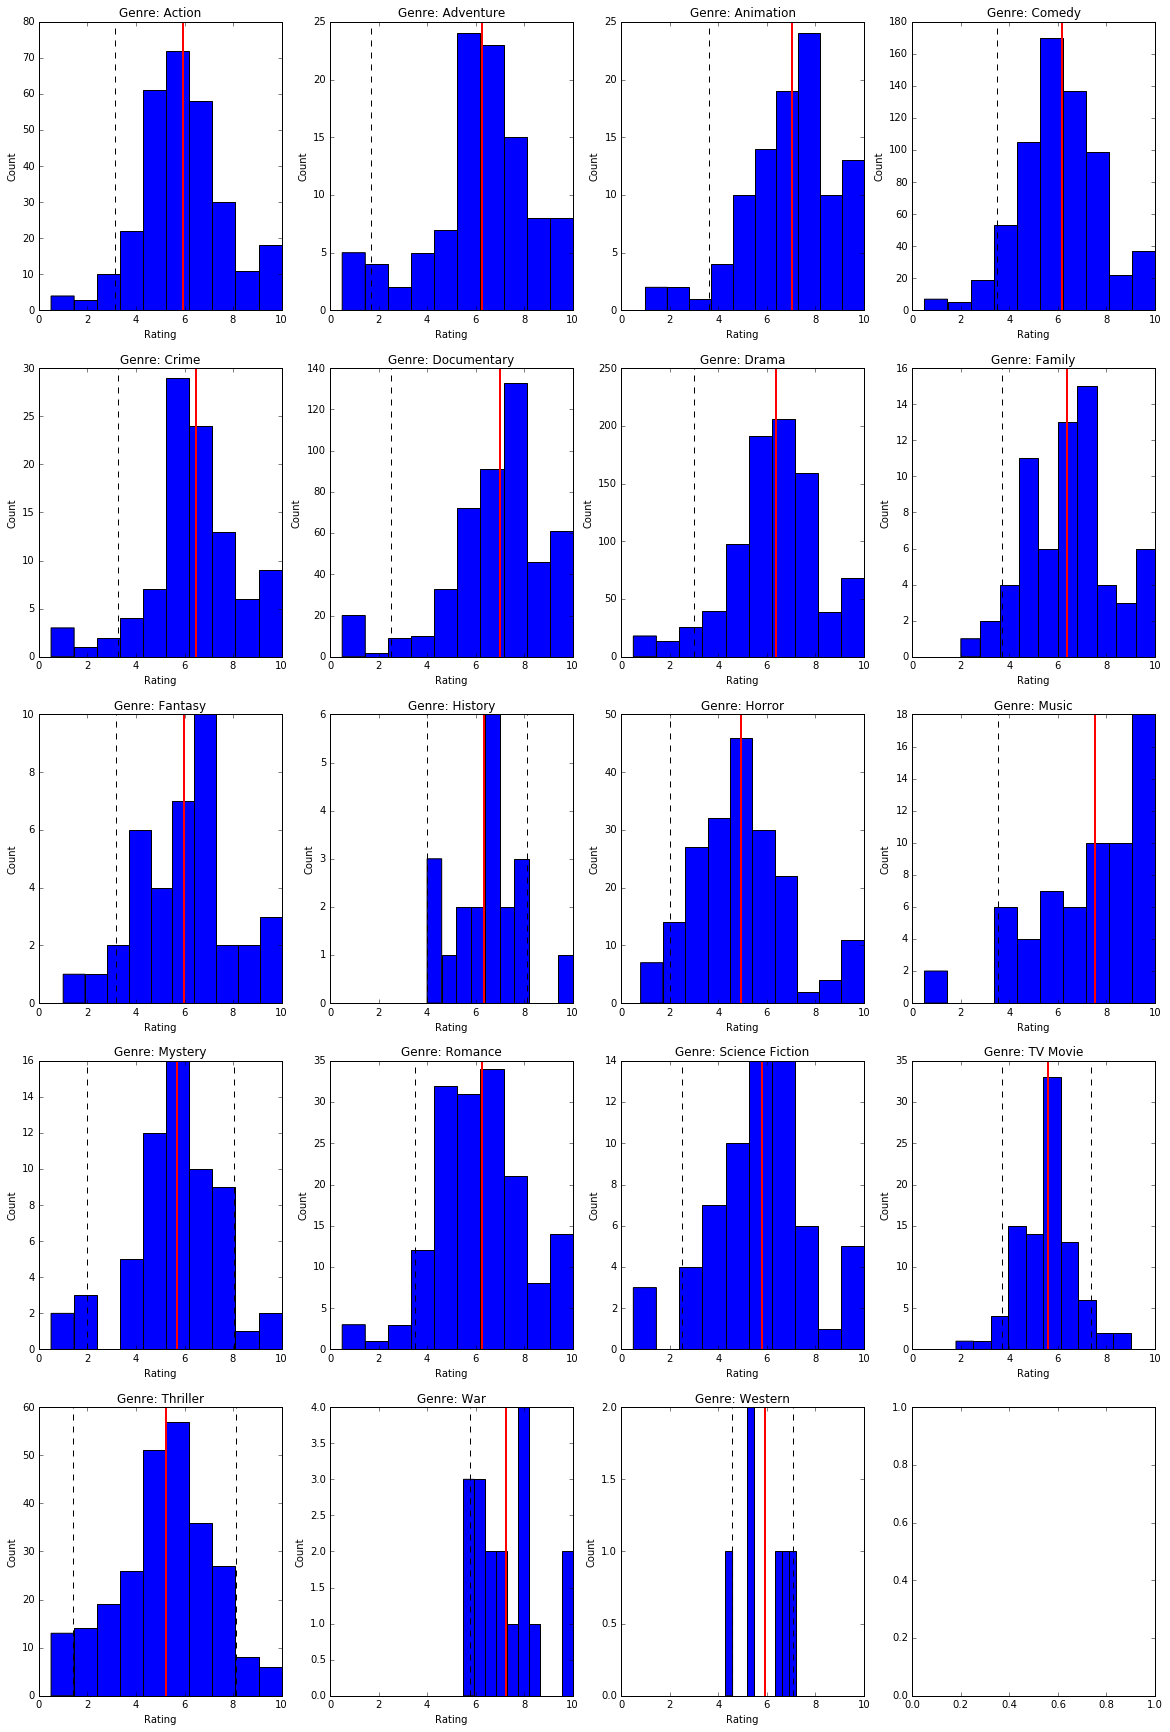

In [49]:
plot_votes_by_genre()
plt.show()

We wanted to see if there were any obvious trends by genre when looking at their average TMDb ratings, so we constructed histograms for each genre.  Generally, these centered around 6 but there were a few exceptions: Horror and Thriller movies have on average lower ratings while Music movies are rated significantly higher, to the degree that the distribution doesn't resemble a normal bell curve but is heavily weighted on the high-end of the scale.  Overall, it looks like there is enough disparity across genres that we should consider including ratings as one of our predictor variables in detecting genre.


## 9. Summary and plots from Wikipedia 

One promissing approach to genre classification could be using plots. A simple Naive Bayes model or a more complicated model like Latent Dirichelet Allocation are expected to be pretty powerful tools for this task. Probability classifiers, contrary to methods like Support Vector Classifiers which only focus on a few vectors to seperate classes, give us probability distribution over classes which will be useful here. Indeed movies can belong to several genres and probability distributions will indicate how "pure" a movie is relative to its genre. 

In [61]:
print wikipedia.summary("Lost in translation (film)")

Lost in Translation is a 2003 American romantic comedy-drama film written and directed by Sofia Coppola. It was her second feature film after The Virgin Suicides (1999). It stars Bill Murray as aging actor Bob Harris, who befriends college graduate Charlotte (Scarlett Johansson) in a Tokyo hotel.
Lost in Translation received critical acclaim and was nominated for four Academy Awards, including Best Picture, Best Actor for Bill Murray, and Best Director for Coppola; Coppola won for Best Original Screenplay. Murray and Johansson each won a BAFTA award for Best Actor in a Leading Role and Best Actress in a Leading Role respectively. The film was a commercial success, grossing $119 million on a budget of $4 million. It is now often regarded as one of the best films of the 2000s.


In [68]:
lostintranslation_wiki = wikipedia.page("Lost in translation (film)")

print lostintranslation_wiki.title
print lostintranslation_wiki.url
print lostintranslation_wiki.content

Lost in Translation (film)
https://en.wikipedia.org/wiki/Lost_in_Translation_(film)
Lost in Translation is a 2003 American romantic comedy-drama film written and directed by Sofia Coppola. It was her second feature film after The Virgin Suicides (1999). It stars Bill Murray as aging actor Bob Harris, who befriends college graduate Charlotte (Scarlett Johansson) in a Tokyo hotel.
Lost in Translation received critical acclaim and was nominated for four Academy Awards, including Best Picture, Best Actor for Bill Murray, and Best Director for Coppola; Coppola won for Best Original Screenplay. Murray and Johansson each won a BAFTA award for Best Actor in a Leading Role and Best Actress in a Leading Role respectively. The film was a commercial success, grossing $119 million on a budget of $4 million. It is now often regarded as one of the best films of the 2000s.


== Plot ==
Bob Harris, an aging American movie star, arrives in Tokyo to film an advertisement for Suntory whisky. Charlotte, a 

## 10. Some papers to read and videos to watch

https://stanford.edu/~kuprel/cs221report.pdf

http://www.thegeekmovement.com/Tanenbaum_GenreTree_Paper.pdf

ML Final Project - IMDb movie genre classification 
https://www.youtube.com/watch?v=fkzgZnEHQOA

## 11. Insights

### Challenges
Some challenges that are immediately evident are 1) movies being categorized by multiple genres, 2) potential disparity between genre(s) classifications between TMDb and IMDb and 3) accurately merging the data based on movie name.

For the first challenge, there are a couple of potential paths forward, such as limiting our data to just the first genre listed, as they appear to be in order of relativity.  Or, parsing the genres into their own categories as the number of genres a movie could classify as may be significant in our ability to accurately predict genre.

For the second, we might first create a mapping that ensures the list of potential genres is unique (e.g. if TMDb has a genre of "Family" but the equivalent in IMDb is "Family Friendly", create a mapping from Family Friendly to Family).  Additionally, our choice of paths for the first challenge would impact how we align genres between the two databases.

Thirdly, matching on movie name assumes both databases use the same text string, which could get iffy.  We may need to evaluate merging only on exact matches or allowing for "fuzzy" matches.

### Visualizations
Some visualizations we'd like to do once we figure out how to extract larger sections of the database are:
    * Counts of movies by genre by year, to get a sense if there have been trends
    * Budget by Revenue by Popularity colored by genre, to see if certain genres do better with larger budgets (for example, action movies likely require a larger budget to be popular)
    * Bubble clusters of top keywords in movie description colored by genre, to show any relationship between description and genre
    
### Questions
Some questions we could consider trying to answer:
    * Can one predict a movie's genre based on the color tone of its poster?
    * Can one predict a movie's genre based on the existence of key words in its description or summary?
    * Given two posters, both of which include two characters, can we use deep learning to distinguish a romantic comedy from a classic romance?
    * Is the gender or age of the main character significant in predicting genre?
        
### Next Steps
Once we are able to download more data and get insight from visuals like the ones listed above, our next steps will likely be to try a simple Naive Bayes classifier on things like movie description and plot to see if we can identify keywords per genre.  We will also begin looking into doing deep learning on the posters.  Another thought we may look into is incorporating a movie's soundtrack, but that will depend on how much information is publicly available in the form of metadata rather than music files.